In [1]:
%matplotlib inline 
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report


#K-Means import
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from time import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def bench_k_means(estimator, name, data,labels=None):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=None)))
    return estimator

# K-Means Fold 1

In [4]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
traindata=pd.read_csv("./test1.tsv",delimiter="\t")
X_test=traindata.text.values
Y_test=np.array(traindata.label.values).astype(np.int32)

traindata=pd.read_csv("./train1.tsv",delimiter="\t")
X_train=traindata.text.values
Y_train=np.array(traindata.label.values).astype(np.int32)
clf = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))), ('tfidf', TfidfTransformer(use_idf=True))])
clf.fit(X_train)


X_train=(clf.transform(X_train)).toarray()
X_test=clf.transform(X_test)

data=X_train
labels=np.array(Y_train)-1
# print(labels)

# Do K-Means
for rstate in [16]:
    
    print("Random State", rstate)
    
    print(82 * '_')
    print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')
    km1_km=bench_k_means(KMeans(init='k-means++', n_clusters=4, n_init=10,random_state=rstate), name="k-means++", data=data,labels=labels)

    km1_random=bench_k_means(KMeans(init='random', n_clusters=4, n_init=10,random_state=rstate), name="random", data=data,labels=labels)


    pca = PCA(n_components=4).fit(data) 
    km1_pca=bench_k_means(KMeans(init=pca.components_, n_clusters=4, n_init=1,random_state=rstate), name="PCA-based", data=data,labels=labels)
    print(82 * '_')


    print("kmeans++ Initialization")
    ypred=km1_km.predict(X_test)
    print(classification_report(np.array(Y_test)-1,ypred,digits=5))
    cfmatrix=confusion_matrix(np.array(Y_test)-1,ypred)
    print(cfmatrix)
    

#     print("Random Initialization")
#     ypred=km1_random.predict(X_test)
#     print(classification_report(np.array(Y_test)-1,ypred,digits=5))


#     print("PCA Components Initialization")
#     ypred=km1_pca.predict(X_test)
#     print(classification_report(np.array(Y_test)-1,ypred,digits=5))

Random State 16
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	1.04s	264	0.019	0.017	0.018	-0.005	0.005	0.002
random   	0.85s	264	0.027	0.023	0.025	-0.006	0.012	0.002
PCA-based	0.11s	264	0.029	0.026	0.027	0.018	0.014	0.003
__________________________________________________________________________________
kmeans++ Initialization
              precision    recall  f1-score   support

           0    0.41935   0.22414   0.29213        58
           1    0.63077   0.45556   0.52903        90
           2    0.20000   0.25000   0.22222        12
           3    0.15068   0.45833   0.22680        24

    accuracy                        0.36957       184
   macro avg    0.35020   0.34701   0.31755       184
weighted avg    0.47341   0.36957   0.39493       184

[[13 14  1 30]
 [13 41 11 25]
 [ 0  2  3  7]
 [ 5  8  0 11]]


C:\Users\MANIKANDAN\Desktop\dl2020-env\lib\site-packages\ipykernel_launcher.py:162: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
C:\Users\MANIKANDAN\Desktop\dl2020-env\lib\site-packages\ipykernel_launcher.py:163: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
C:\Users\MANIKANDAN\Desktop\dl2020-env\lib\site-packages\ipykernel_launcher.py:165: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
C:\Users\MANIKANDAN\Desktop\dl2020-env\lib\site-packages\ipykernel_launcher.py:166: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
C:\Users\MANIKANDAN\Desktop\dl2020-env\lib\site-pack

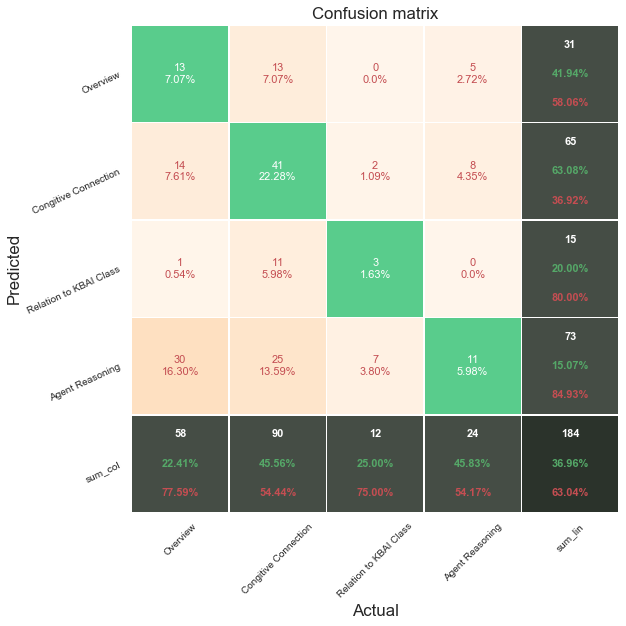

In [7]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


df_cm = pd.DataFrame(cfmatrix, index=["stage 1", "stage 2", "stage 3", "stagte 4"], columns=["stage 1", "stage 2", "stage 3", "stagte 4"])
# # plt.figure(figsize=(10,7))
# sn.set(font_scale=1.4) # for label size
# sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

# plt.show()

from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.collections import QuadMesh
import seaborn as sn


def get_new_fig(fn, figsize=[9,9]):
    """ Init graphics """
    fig1 = plt.figure(fn, figsize)
    ax1 = fig1.gca()   #Get Current Axis
    ax1.cla() # clear existing plot
    return fig1, ax1
#

def configcell_text_and_colors(array_df, lin, col, oText, facecolors, posi, fz, fmt, show_null_values=0):
    """
      config cell text and colors
      and return text elements to add and to dell
      @TODO: use fmt
    """
    text_add = []; text_del = [];
    cell_val = array_df[lin][col]
    tot_all = array_df[-1][-1]
    per = (float(cell_val) / tot_all) * 100
    curr_column = array_df[:,col]
    ccl = len(curr_column)

    #last line  and/or last column
    if(col == (ccl - 1)) or (lin == (ccl - 1)):
        #tots and percents
        if(cell_val != 0):
            if(col == ccl - 1) and (lin == ccl - 1):
                tot_rig = 0
                for i in range(array_df.shape[0] - 1):
                    tot_rig += array_df[i][i]
                per_ok = (float(tot_rig) / cell_val) * 100
            elif(col == ccl - 1):
                tot_rig = array_df[lin][lin]
                per_ok = (float(tot_rig) / cell_val) * 100
            elif(lin == ccl - 1):
                tot_rig = array_df[col][col]
                per_ok = (float(tot_rig) / cell_val) * 100
            per_err = 100 - per_ok
        else:
            per_ok = per_err = 0

        per_ok_s = ['%.2f%%'%(per_ok), '100%'] [per_ok == 100]

        #text to DEL
        text_del.append(oText)

        #text to ADD
        font_prop = fm.FontProperties(weight='bold', size=fz)
        text_kwargs = dict(color='w', ha="center", va="center", gid='sum', fontproperties=font_prop)
        lis_txt = ['%d'%(cell_val), per_ok_s, '%.2f%%'%(per_err)]
        lis_kwa = [text_kwargs]
        dic = text_kwargs.copy(); dic['color'] = 'g'; lis_kwa.append(dic);
        dic = text_kwargs.copy(); dic['color'] = 'r'; lis_kwa.append(dic);
        lis_pos = [(oText._x, oText._y-0.3), (oText._x, oText._y), (oText._x, oText._y+0.3)]
        for i in range(len(lis_txt)):
            newText = dict(x=lis_pos[i][0], y=lis_pos[i][1], text=lis_txt[i], kw=lis_kwa[i])
            #print 'lin: %s, col: %s, newText: %s' %(lin, col, newText)
            text_add.append(newText)
        #print '\n'

        #set background color for sum cells (last line and last column)
        carr = [0.27, 0.30, 0.27, 1.0]
        if(col == ccl - 1) and (lin == ccl - 1):
            carr = [0.17, 0.20, 0.17, 1.0]
        facecolors[posi] = carr

    else:
        if(per > 0):
            txt = '%s\n%.2f%%' %(cell_val, per)
        else:
            if(show_null_values == 0):
                txt = ''
            elif(show_null_values == 1):
                txt = '0'
            else:
                txt = '0\n0.0%'
        oText.set_text(txt)

        #main diagonal
        if(col == lin):
            #set color of the textin the diagonal to white
            oText.set_color('w')
            # set background color in the diagonal to blue
            facecolors[posi] = [0.35, 0.8, 0.55, 1.0]
        else:
            oText.set_color('r')

    return text_add, text_del
#

def insert_totals(df_cm):
    """ insert total column and line (the last ones) """
    sum_col = []
    for c in df_cm.columns:
        sum_col.append( df_cm[c].sum() )
    sum_lin = []
    for item_line in df_cm.iterrows():
        sum_lin.append( item_line[1].sum() )
    df_cm['sum_lin'] = sum_lin
    sum_col.append(np.sum(sum_lin))
    df_cm.loc['sum_col'] = sum_col
    #print ('\ndf_cm:\n', df_cm, '\n\b\n')
#

def pretty_plot_confusion_matrix(df_cm, annot=True, cmap="Oranges", fmt='.2f', fz=11,
      lw=0.5, cbar=False, figsize=[8,8], show_null_values=0, pred_val_axis='y'):
    """
      print conf matrix with default layout (like matlab)
      params:
        df_cm          dataframe (pandas) without totals
        annot          print text in each cell
        cmap           Oranges,Oranges_r,YlGnBu,Blues,RdBu, ... see:
        fz             fontsize
        lw             linewidth
        pred_val_axis  where to show the prediction values (x or y axis)
                        'col' or 'x': show predicted values in columns (x axis) instead lines
                        'lin' or 'y': show predicted values in lines   (y axis)
    """
    if(pred_val_axis in ('col', 'x')):
        xlbl = 'Predicted'
        ylbl = 'Actual'
    else:
        xlbl = 'Actual'
        ylbl = 'Predicted'
        df_cm = df_cm.T

    # create "Total" column
    insert_totals(df_cm)

    #this is for print allways in the same window
    fig, ax1 = get_new_fig('Conf matrix default', figsize)

    #thanks for seaborn
    ax = sn.heatmap(df_cm, annot=annot, annot_kws={"size": fz}, linewidths=lw, ax=ax1,
                    cbar=cbar, cmap=cmap, linecolor='w', fmt=fmt)

    #set ticklabels rotation
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, fontsize = 10)
    ax.set_yticklabels(ax.get_yticklabels(), rotation = 25, fontsize = 10)

    # Turn off all the ticks
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    #face colors list
    quadmesh = ax.findobj(QuadMesh)[0]
    facecolors = quadmesh.get_facecolors()

    #iter in text elements
    array_df = np.array( df_cm.to_records(index=False).tolist() )
    text_add = []; text_del = [];
    posi = -1 #from left to right, bottom to top.
    for t in ax.collections[0].axes.texts: #ax.texts:
        pos = np.array( t.get_position()) - [0.5,0.5]
        lin = int(pos[1]); col = int(pos[0]);
        posi += 1
        #print ('>>> pos: %s, posi: %s, val: %s, txt: %s' %(pos, posi, array_df[lin][col], t.get_text()))

        #set text
        txt_res = configcell_text_and_colors(array_df, lin, col, t, facecolors, posi, fz, fmt, show_null_values)

        text_add.extend(txt_res[0])
        text_del.extend(txt_res[1])

    #remove the old ones
    for item in text_del:
        item.remove()
    #append the new ones
    for item in text_add:
        ax.text(item['x'], item['y'], item['text'], **item['kw'])

    #titles and legends
    ax.set_title('Confusion matrix')
    ax.set_xlabel(xlbl)
    ax.set_ylabel(ylbl)
    plt.tight_layout()  #set layout slim
    plt.show()
#

def plot_confusion_matrix_from_data(y_test, predictions, columns=None, annot=True, cmap="Oranges",
      fmt='.2f', fz=11, lw=0.5, cbar=False, figsize=[8,8], show_null_values=0, pred_val_axis='lin'):
    """
        plot confusion matrix function with y_test (actual values) and predictions (predic),
        whitout a confusion matrix yet
    """
    from sklearn.metrics import confusion_matrix
    from pandas import DataFrame

    #data
    if(not columns):
        #labels axis integer:
        ##columns = range(1, len(np.unique(y_test))+1)
        #labels axis string:
        from string import ascii_uppercase
        columns = ['class %s' %(i) for i in list(ascii_uppercase)[0:len(np.unique(y_test))]]

    confm = confusion_matrix(y_test, predictions)
    cmap = 'Oranges';
    fz = 11;
    figsize=[9,9];
    show_null_values = 2
    df_cm = DataFrame(confm, index=columns, columns=columns)
    pretty_plot_confusion_matrix(df_cm, fz=fz, cmap=cmap, figsize=figsize, show_null_values=show_null_values, pred_val_axis=pred_val_axis)
#

plot_confusion_matrix_from_data(np.array(Y_test)-1,ypred,columns=["Overview","Congitive Connection","Relation to KBAI Class","Agent Reasoning"])

# K-MeansFold 2

In [44]:
from sklearn.dummy import DummyClassifier
traindata=pd.read_csv("./test2.tsv",delimiter="\t")
X_test=traindata.text.values
Y_test=np.array(traindata.label.values).astype(np.int32)

traindata=pd.read_csv("./train2.tsv",delimiter="\t")
X_train=traindata.text.values
Y_train=np.array(traindata.label.values).astype(np.int32)
clf = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))), ('tfidf', TfidfTransformer(use_idf=True))])
clf.fit(X_train)


X_train=(clf.transform(X_train)).toarray()
X_test=clf.transform(X_test)

data=X_train
labels=np.array(Y_train)-1
# print(labels)

# Do K-Means
# Do K-Means
for rstate in [2]:
    
    print("Random State", rstate)
    
    print(82 * '_')
    print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')
    km1_km=bench_k_means(KMeans(init='k-means++', n_clusters=4, n_init=10,random_state=rstate), name="k-means++", data=data,labels=labels)

    km1_random=bench_k_means(KMeans(init='random', n_clusters=4, n_init=10,random_state=rstate), name="random", data=data,labels=labels)


    pca = PCA(n_components=4).fit(data) 
    km1_pca=bench_k_means(KMeans(init=pca.components_, n_clusters=4, n_init=1,random_state=rstate), name="PCA-based", data=data,labels=labels)
    print(82 * '_')


    print("kmeans++ Initialization")
    ypred=km1_km.predict(X_test)
    print(classification_report(np.array(Y_test)-1,ypred,digits=5))

    print("Random Initialization")
    ypred=km1_random.predict(X_test)
    print(classification_report(np.array(Y_test)-1,ypred,digits=5))


    print("PCA Components Initialization")
    ypred=km1_pca.predict(X_test)
    print(classification_report(np.array(Y_test)-1,ypred,digits=5))


Random State 2
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.94s	264	0.042	0.037	0.039	0.027	0.026	0.003
random   	0.85s	264	0.035	0.032	0.033	0.012	0.020	0.003
PCA-based	0.10s	264	0.044	0.039	0.042	0.009	0.029	0.004
__________________________________________________________________________________
kmeans++ Initialization
              precision    recall  f1-score   support

           0    0.40000   0.46429   0.42975        56
           1    0.57407   0.34444   0.43056        90
           2    0.15152   0.33333   0.20833        15
           3    0.15625   0.21739   0.18182        23

    accuracy                        0.36413       184
   macro avg    0.32046   0.33986   0.31261       184
weighted avg    0.43442   0.36413   0.38110       184

Random Initialization
              precision    recall  f1-score   support

           0    0.29268   0.21429   0.24742        56
     

# Testing Autoclustering with Elbow Method


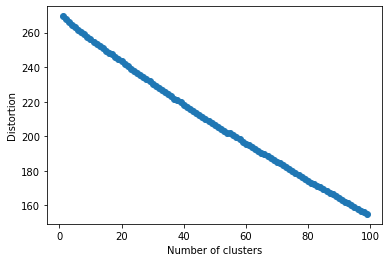

In [48]:
# FOld -1

from sklearn.dummy import DummyClassifier
traindata=pd.read_csv("./test1.tsv",delimiter="\t")
X_test=traindata.text.values
Y_test=np.array(traindata.label.values).astype(np.int32)

traindata=pd.read_csv("./train1.tsv",delimiter="\t")
X_train=traindata.text.values
Y_train=np.array(traindata.label.values).astype(np.int32)
clf = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))), ('tfidf', TfidfTransformer(use_idf=True))])
clf.fit(X_train)


X_train=(clf.transform(X_train)).toarray()
X_test=clf.transform(X_test)

data=X_train
labels=np.array(Y_train)-1
# print(labels)


distortions = []
for i in range(1, 100):
    km = KMeans(init='k-means++', n_clusters=i, n_init=10,random_state=rstate)
    km.fit(data)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 100), distortions, marker='-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

# K-Means with Learnt BERT Representations

In [56]:
import pickle

X_train= pickle.load(open('./bert_features/fold1/xtrain.pkl', 'rb'))
Y_train= pickle.load(open('./bert_features/fold1/ytrain.pkl', 'rb'))
X_test= pickle.load(open('./bert_features/fold1/xtest.pkl', 'rb'))
Y_test= pickle.load(open('./bert_features/fold1/ytest.pkl', 'rb'))


data=X_train
labels=np.array(Y_train)
# print(labels)

# Do K-Means
for rstate in [23]:
    
    print("Random State", rstate)
    
    print(82 * '_')
    print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')
    km1_km=bench_k_means(KMeans(init='k-means++', n_clusters=4, n_init=10,random_state=rstate), name="k-means++", data=data,labels=labels)

    km1_random=bench_k_means(KMeans(init='random', n_clusters=4, n_init=10,random_state=rstate), name="random", data=data,labels=labels)


    pca = PCA(n_components=4).fit(data) 
    km1_pca=bench_k_means(KMeans(init=pca.components_, n_clusters=4, n_init=1,random_state=rstate), name="PCA-based", data=data,labels=labels)
    print(82 * '_')


    print("kmeans++ Initialization")
    ypred=km1_km.predict(X_test)
    print(classification_report(np.array(Y_test),ypred,digits=5))

    print("Random Initialization")
    ypred=km1_random.predict(X_test)
    print(classification_report(np.array(Y_test),ypred,digits=5))


    print("PCA Components Initialization")
    ypred=km1_pca.predict(X_test)
    print(classification_report(np.array(Y_test),ypred,digits=5))

Random State 23
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.28s	3385	0.027	0.027	0.027	0.028	0.013	0.226
random   	0.31s	3387	0.023	0.023	0.023	0.011	0.009	0.205
PCA-based	0.03s	3387	0.024	0.024	0.024	0.026	0.010	0.234
__________________________________________________________________________________
kmeans++ Initialization
              precision    recall  f1-score   support

           0    0.47368   0.31034   0.37500        58
           1    0.67273   0.41111   0.51034        90
           2    0.00000   0.00000   0.00000        12
           3    0.16667   0.62500   0.26316        24

    accuracy                        0.38043       184
   macro avg    0.32827   0.33661   0.28713       184
weighted avg    0.50010   0.38043   0.40216       184

Random Initialization
              precision    recall  f1-score   support

           0    0.23636   0.22414   0.23009        58
 

In [59]:
import pickle

X_train= pickle.load(open('./bert_features/fold2/xtrain.pkl', 'rb'))
Y_train= pickle.load(open('./bert_features/fold2/ytrain.pkl', 'rb'))
X_test= pickle.load(open('./bert_features/fold2/xtest.pkl', 'rb'))
Y_test= pickle.load(open('./bert_features/fold2/ytest.pkl', 'rb'))


data=X_train
labels=np.array(Y_train)
# print(labels)

# Do K-Means
for rstate in [1]:
    
    print("Random State", rstate)
    
    print(82 * '_')
    print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')
    km1_km=bench_k_means(KMeans(init='k-means++', n_clusters=4, n_init=10,random_state=rstate), name="k-means++", data=data,labels=labels)

    km1_random=bench_k_means(KMeans(init='random', n_clusters=4, n_init=10,random_state=rstate), name="random", data=data,labels=labels)


    pca = PCA(n_components=4).fit(data) 
    km1_pca=bench_k_means(KMeans(init=pca.components_, n_clusters=4, n_init=1,random_state=rstate), name="PCA-based", data=data,labels=labels)
    print(82 * '_')


    print("kmeans++ Initialization")
    ypred=km1_km.predict(X_test)
    print(classification_report(np.array(Y_test),ypred,digits=5))

    print("Random Initialization")
    ypred=km1_random.predict(X_test)
    print(classification_report(np.array(Y_test),ypred,digits=5))


    print("PCA Components Initialization")
    ypred=km1_pca.predict(X_test)
    print(classification_report(np.array(Y_test),ypred,digits=5))

Random State 1
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.35s	3281	0.023	0.024	0.023	0.030	0.008	0.247
random   	0.37s	3293	0.034	0.035	0.035	0.035	0.020	0.232
PCA-based	0.05s	3293	0.022	0.022	0.022	0.023	0.008	0.241
__________________________________________________________________________________
kmeans++ Initialization
              precision    recall  f1-score   support

           0    0.29630   0.42857   0.35036        56
           1    0.50000   0.38889   0.43750        90
           2    0.16667   0.33333   0.22222        15
           3    0.33333   0.04348   0.07692        23

    accuracy                        0.35326       184
   macro avg    0.32407   0.29857   0.27175       184
weighted avg    0.39000   0.35326   0.34836       184

Random Initialization
              precision    recall  f1-score   support

           0    0.35897   0.25000   0.29474        56
  